<a href="https://colab.research.google.com/github/saddamaziz/UTS-Data-Engineering/blob/main/Copy_of_Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('ds_salaries.csv')

missing_values = df.isnull().sum()

print ('Missing Values : \n',missing_values)

Missing Values : 
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# load data from CSV file
df = pd.read_csv('ds_salaries.csv')

# define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    # check if data is numeric
    if np.issubdtype(data.dtype, np.number):
        # calculate first and third quartiles
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        # calculate IQR
        iqr = q3 - q1
        # calculate lower and upper bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # detect outliers
        outliers = (data < lower_bound) | (data > upper_bound)
        return outliers
    else:
        return pd.Series([False] * len(data), index=data.index)

# detect outliers in each column
for column in df.columns:
    outliers = detect_outliers_iqr(df[column])
    if outliers.any():
        print(f"Outliers detected in column '{column}':\n{df[outliers]}")

Outliers detected in column 'work_year':
      work_year experience_level employment_type                  job_title  \
183        2020               EX              FT         Staff Data Analyst   
2118       2020               MI              FT      Business Data Analyst   
3119       2020               EN              FT              Data Engineer   
3120       2020               EN              FT              Data Engineer   
3138       2020               EN              FT               Data Analyst   
...         ...              ...             ...                        ...   
3743       2020               MI              FT              Data Engineer   
3744       2020               SE              FT  Machine Learning Engineer   
3750       2020               SE              FT             Data Scientist   
3752       2020               EN              FT             Data Scientist   
3753       2020               EN              CT      Business Data Analyst   

       sal

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

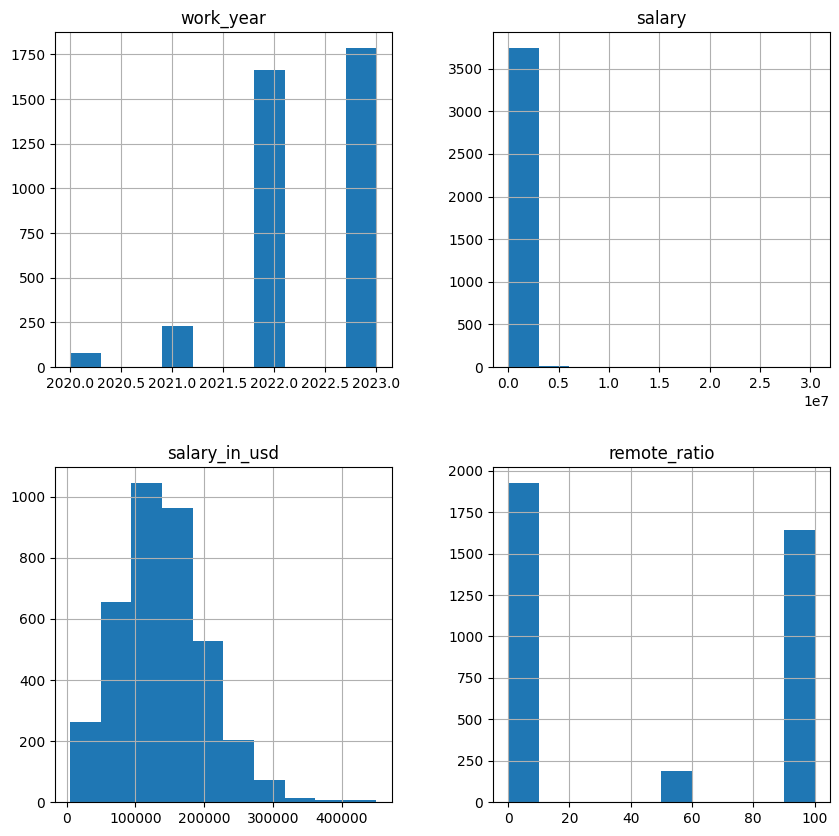

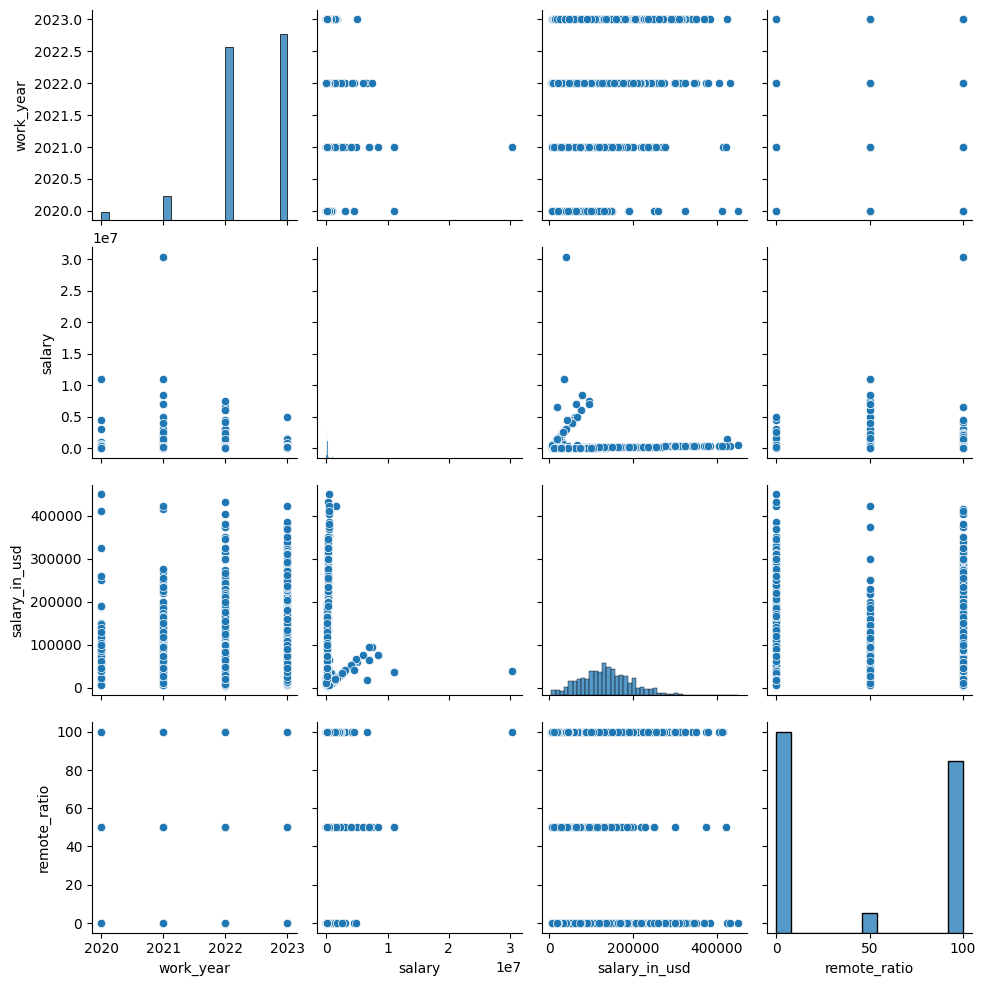

<ipython-input-5-5b68a74aba99>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


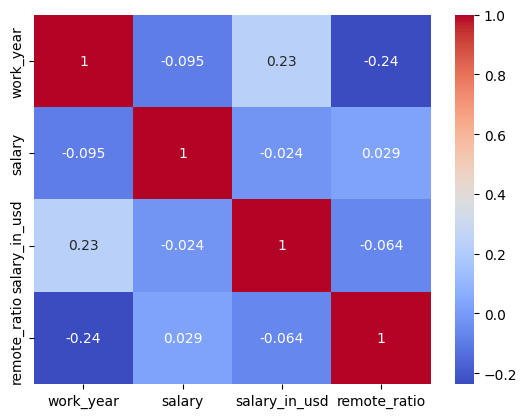

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# membaca file csv
df = pd.read_csv('ds_salaries.csv')

# melihat 5 baris pertama dari data
print(df.head())

# melihat informasi mengenai dataset
print(df.info())

# membuat summary statistics
print(df.describe(include='all'))

# membuat histogram dari setiap variabel
df.hist(bins=10, figsize=(10,10))
plt.show()

# membuat scatter plot
sns.pairplot(df, diag_kind='hist')
plt.show()

# membuat heatmap korelasi
corr = df.corr(method='pearson')
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  cluster  
0               ES            L        0  


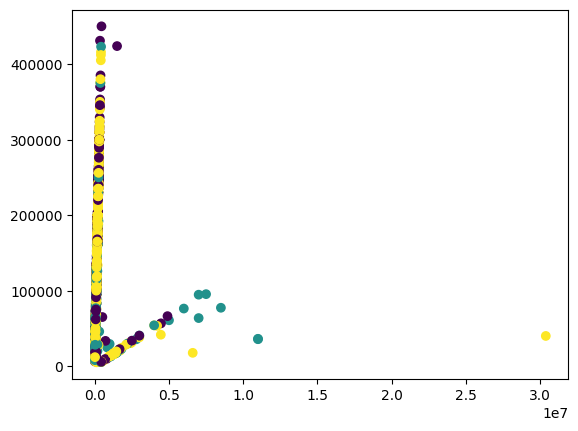

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans

# Baca data CSV
df = pd.read_csv('ds_salaries.csv')

# Pilih kolom yang akan diklusterkan
data = df[['work_year','salary', 'salary_in_usd', 'remote_ratio']]


# Definisikan jumlah kluster 
n_clusters = 3

# Inisialisasi kmeans 
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Pelatihan kmeans 
kmeans.fit(data) 


# Dapatkan label kluster 
labels = kmeans.labels_  

# Tambahkan label kluster ke dalam dataframe 
df['cluster'] = labels
# Lihat hasil kluster 
print(df.head())

# Hitung jumlah data di tiap kluster 
print(df['cluster'].value_counts())

# Plot hasil kluster
import matplotlib.pyplot as plt 
plt.scatter(df['salary'], df['salary_in_usd'], c=df['remote_ratio'], cmap='viridis');
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# load data
df = pd.read_csv('ds_salaries.csv')

# remove missing values
df = df.dropna()

# separate features and target variable

X = df[['salary', 'work_year']]

# perform PCA
pca = PCA()
pca.fit(X)

# calculate explained variance ratio for each PC
explained_var_ratio = pca.explained_variance_ratio_

# calculate cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# print explained variance ratio and cumulative explained variance ratio
print('Explained Variance Ratio:\n', explained_var_ratio)
print('\nCumulative Explained Variance Ratio:\n', cumulative_var_ratio)


Explained Variance Ratio:
 [1.00000000e+00 1.05023066e-12]

Cumulative Explained Variance Ratio:
 [1. 1.]
